# 猫狗识别 V2

## 数据预处理

### 准备数据

In [1]:
import os, shutil

# 原始数据集解压目录的路径
original_dataset_dir = './dataset/all/train'

# 保存较小的数据集目录
base_dir = './dataset/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# 训练数据目录
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

# 验证数据目录
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# 测试数据目录
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# 猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# 狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# 猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# 狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# 猫的测试集图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# 狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


将前1000张**猫**的图像复制到train_cats_dir中

In [2]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张猫的图像复制到validation_cats_dir中

In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张猫的图像复制到test_cats_dir中

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

将前1000张**狗**的图像复制到train_dogs_dir中

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张狗的图像复制到validaiton_dogs_fir中

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

将接下来的500张狗的图像复制到test_dogs_dir中

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

查看每个分组(训练/验证/测试)中分别包含多少张图像

In [8]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))


total training cat images:  1000


In [9]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [10]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


## 优化模型

### 使用数据增强

数据增强是从现有的训练样本中生成更多的训练数据,其方法是利用多种能够生成的可信图像的随机变化来**增加(augment)**样本.

其目标是,模型在训练时不会两次查看完全相同的图像.这让模型能够观察到数据的更多内容,从而具有更好的泛化能力.



#### 利用ImageDataGenerator设置数据增强

In [11]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [12]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

#### 显示几个随机增强后的训练图像

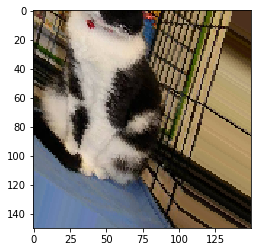

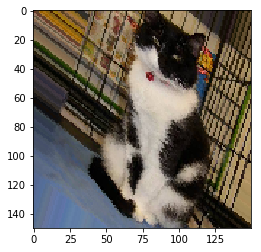

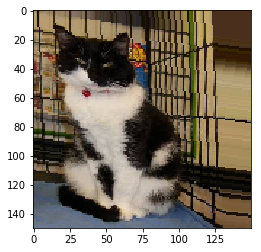

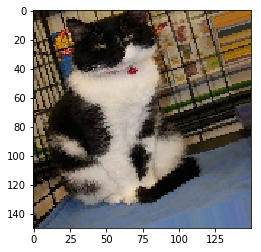

In [15]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# 选择一张图像
img_path = fnames[3]

#读取图像并调整大小
img = image.load_img(img_path, target_size = (150, 150))

#将其转换成形状(150, 150, 3)的Numpy数组
x = image.img_to_array(img)

#将其形状改变为(1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i + 1
    if i % 4 == 0:
        break
        
plt.show()

#### 定义一个包含dropout的新卷积神经网络

In [17]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True)

**数据预处理**

* 读取图像文件
* 将JEPG文件解码为RGB像素网格
* 将这些像素网格转换称浮点数张量
* 将像素值(0~255范围内)缩放到[0-1]区间内

#### 利用数据增强生成器训练网络

In [20]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 模型拟合

In [21]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/100
 63/100 [=================>............] - ETA: 4s - loss: 0.4764 - acc: 0.7659 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00Epoch 60/100


 63/100 [=================>............] - ETA: 4s - loss: 0.3955 - acc: 0.8219 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00

#### 保存训练好的模型

In [22]:
model.save('cats_and_dogs_small_2.h5')

#### 描绘训练结果

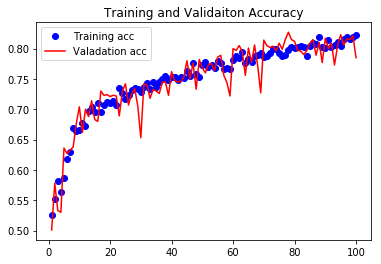

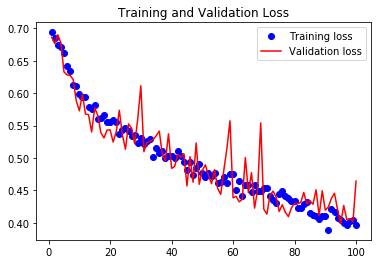

In [24]:
history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

####  评估模型

In [ ]:
#model.evaluate()

### 使用预训练的卷积神经网络

想要将深度学习应用与小型图像数据集,一种常用且非常高校的方法是使用预训练网络.

预训练网络(pretrained network)是一个保存我好的网络,之前已在大型数据集(通常是大规模图像分类任务上训练好).

如果这个原始数据集足够大且足够通用,那么预训练网络学到的特征的空间层级结构可以有效地作为世界的通用模型,因此这些特征可用于各种不同的计算机视觉问题.



使用预训练网络有两张方法:**特征提取**(feature extraction)和**微调模型**(fine tuning).

In [25]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 507s 9us/step


In [27]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [28]:
plot_model(conv_base, to_file='VGG.png',show_shapes=True)

### 不使用数据增强的快速特征提取

#### 使用预训练的卷积基提取特征

In [31]:
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_counts):
    features = np.zeros(shape = (sample_counts, 4, 4, 512))
    labels = np.zeros(shape = (sample_counts))
    generator = datagen.flow_from_directory(
        directory, 
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_counts:
            break
    return features, labels

In [32]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


目前，提取的特征形状为(sample_count, 4, 4, 512)。我们要将起输入到密集链接分类器中，所以首先必须将其形状展成(sample_counts, 8192).

In [38]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 *512))

#### 定义并训练密集链接分类器

In [39]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 *512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 473us/step - loss: 0.6036 - acc: 0.6720 - val_loss: 0.4663 - val_acc: 0.8210
Epoch 2/30
2000/2000 [==============================] - 1s 419us/step - loss: 0.4387 - acc: 0.8020 - val_loss: 0.3799 - val_acc: 0.8510
Epoch 3/30
2000/2000 [==============================] - 1s 424us/step - loss: 0.3698 - acc: 0.8520 - val_loss: 0.3365 - val_acc: 0.8650
Epoch 4/30
2000/2000 [==============================] - 1s 426us/step - loss: 0.3325 - acc: 0.8585 - val_loss: 0.3051 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 1s 419us/step - loss: 0.2930 - acc: 0.8870 - val_loss: 0.2901 - val_acc: 0.8750
Epoch 6/30
2000/2000 [==============================] - 1s 425us/step - loss: 0.2655 - acc: 0.8990 - val_loss: 0.2731 - val_acc: 0.8890
Epoch 7/30
2000/2000 [==============================] - 1s 420us/step - loss: 0.2527 - acc: 0.8985 - val_loss: 0.2665 - val_acc: 0.8810


#### 绘制结果

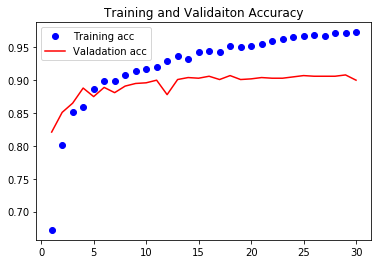

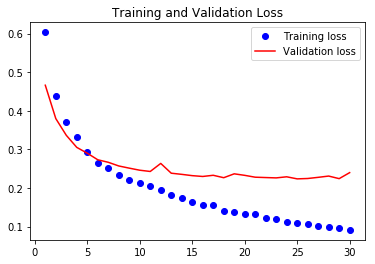

In [40]:
history_list = history.history
acc = history_list['acc']
val_acc = history_list['val_acc']
loss = history_list['loss']
val_loss = history_list['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Valadation acc')
plt.title('Training and Validaiton Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### 使用数据增强的特征提取